### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.


In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
import random

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

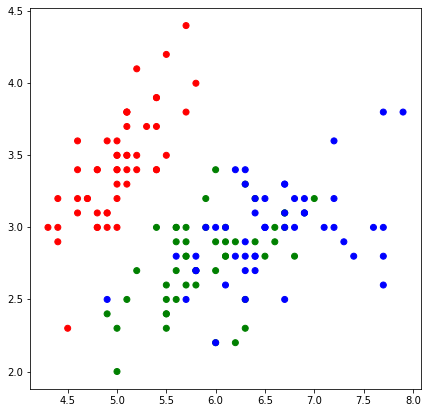

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [7]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [8]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [9]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    q = 0.7
    
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния, ответа на объекте обучающей выборки и веса
            test_distances.append((q**distance, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances, reverse=True)[0:k]:
            classes[d[1]] += 1
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [10]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [11]:
accuracy_knn = []
accuracy_knn_w = []
neighbours = range(1, 11)
for k in neighbours:
    y_pred = (knn(X_train, y_train, X_test, k))
    y_pred_w = (knn_w(X_train, y_train, X_test, k))
    accuracy_knn.append(accuracy(y_pred, y_test))
    accuracy_knn_w.append(accuracy(y_pred_w, y_test))

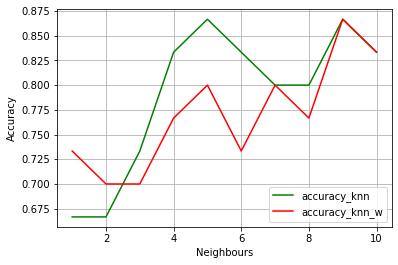

In [12]:
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.plot(neighbours, accuracy_knn, 'green', label='accuracy_knn')
plt.plot(neighbours, accuracy_knn_w, 'red', label='accuracy_knn_w')
plt.legend(loc='lower right')
plt.grid()
plt.show()